In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [105]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_10402/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags,category,skills,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data_available:False, technique:pre_defined_q...",['dynamic'],['correctness'],"['description', 'evaluation']",['OOP']
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[evaluation:auto_grading, approach:semi_automa...","['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']",['OOP']
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[data_available:False, tool:pylint, language:p...",['static'],"['readability', 'maintainability']",['description'],['OOP']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static']",['correctness'],"['description', 'evaluation']",['Unknown']
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[data_available:False, skill:correctness, inte...","['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']",['OOP']


# Meta-Data
### Years Published

In [106]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2021,28
1,2020,28
2,2019,25
3,2018,21
4,2017,20


In [107]:
count_years.no_published.sum()

122

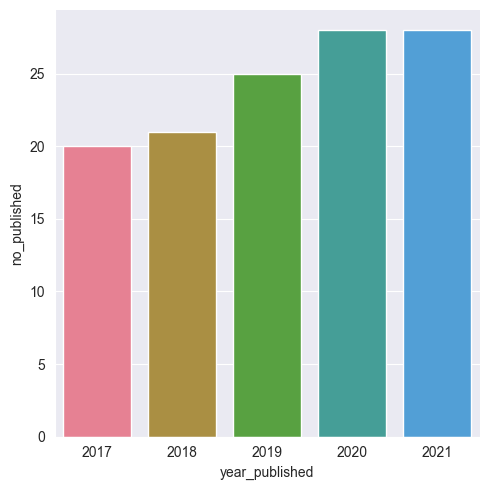

In [108]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.pdf')

## Paper Types

In [109]:
# Scaling up Functional Programming Education: Under the Hood of the OCaml MOOC

paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types['proportion'] = (paper_types.no_type / paper_types.no_type.sum()) * 100
paper_types

,paper_type,no_type,proportion
0,"['description', 'evaluation']",82,67.213115
1,['evaluation'],17,13.934426
2,['description'],12,9.836066
3,['experience'],11,9.016393


In [110]:
paper_types.no_type.sum()

122

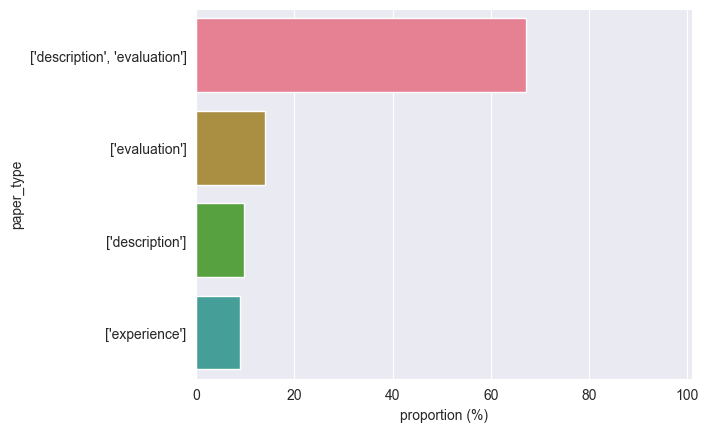

In [111]:
ax_type = sns.barplot(paper_types, y='paper_type', x='proportion')
ax_type.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [112]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto['proportion'] = (auto.number / auto.number.sum()) * 100
auto.head()

,degree_of_automation,number,proportion
0,fully_automated,100,81.967213
1,semi_automatic,17,13.934426
2,unclear,5,4.098361


In [113]:
auto.number.sum()

122

In [114]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
117,Automated data-driven hints for computer progr...,[approach:fully_automated]
118,Learning and teaching numerical methods with a...,[approach:fully_automated]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
120,An AI system for coaching novice programmers,[approach:fully_automated]


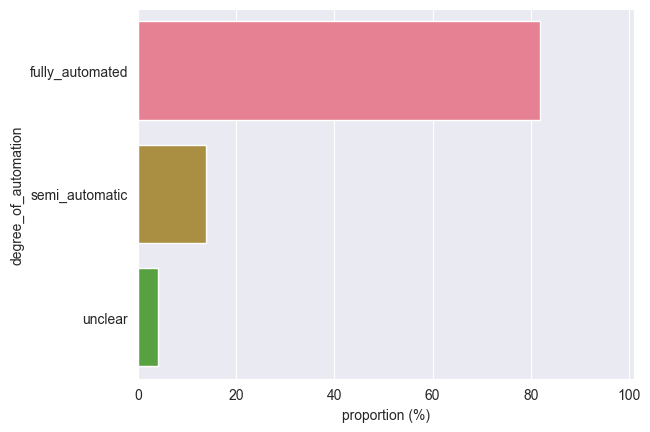

In [115]:
ax_doa = sns.barplot(auto, y='degree_of_automation', x='proportion')
ax_doa.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [116]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter['proportion'] = (inter.number / inter.number.sum()) * 100
inter.head()

,interaction,number,proportion
0,unknown,51,41.803279
1,multiple,50,40.983607
2,single,18,14.754098
3,none,3,2.459016


In [117]:
inter.number.sum()

122

In [118]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
117,Automated data-driven hints for computer progr...,[interaction:multiple]
118,Learning and teaching numerical methods with a...,[interaction:multiple]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
120,An AI system for coaching novice programmers,[interaction:unknown]


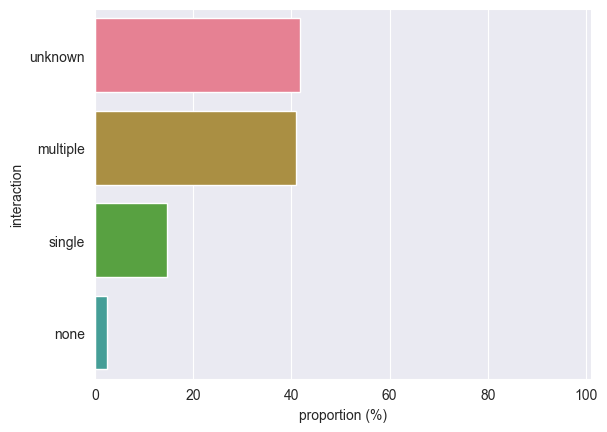

In [119]:
ax_int = sns.barplot(inter, y='interaction', x='proportion')
ax_int.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Category

In [120]:
category = pd.Series([cat for cat in df.category]).value_counts().reset_index()
category.columns = ["category", 'number']
category['proportion'] = (category.number / category.number.sum()) * 100
category

,category,number,proportion
0,['dynamic'],50,41.322314
1,"['dynamic', 'static']",31,25.619835
2,['static'],30,24.793388
3,"['static', 'machine learning']",5,4.132231
4,['machine learning'],3,2.479339
5,"['dynamic', 'machine learning']",1,0.826446
6,"['dynamic', 'static', 'machine learning']",1,0.826446


In [121]:
category.number.sum()

121

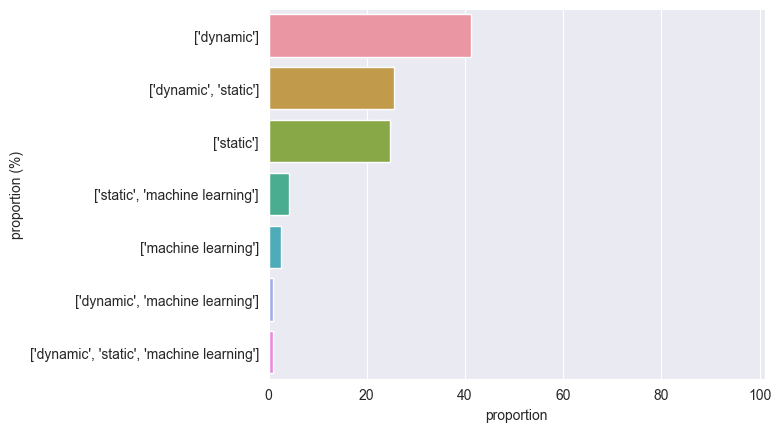

In [122]:
ax_cat = sns.barplot(category, y='category', x='proportion')
ax_cat.set(ylabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/category.pdf', bbox_inches='tight')

In [123]:
cat_time = df[['year_published', 'category']].copy()

cat_time.category = cat_time.category.fillna('') # Remove once final paper is categorised

cat_time['dynamic'] = cat_time.category.map(lambda cat: True if 'dynamic' in cat else False)
cat_time['static'] = cat_time.category.map(lambda cat: True if 'static' in cat else False)
cat_time['machine_learning'] = cat_time.category.map(lambda cat: True if 'machine learning' in cat else False)
cat_time = cat_time.drop(columns=['category'])

cat_time

,year_published,dynamic,static,machine_learning
0,2021,True,False,False
1,2021,True,True,False
2,2021,False,True,False
3,2021,True,True,False
4,2021,True,True,False
...,...,...,...,...
117,2017,True,False,False
118,2017,True,True,False
119,2017,True,False,False
120,2017,False,True,True


In [124]:
cat_time.year_published = cat_time.year_published.astype('str')
cat_time_sum = cat_time.groupby('year_published').sum().cumsum()
cat_time_sum

,dynamic,static,machine_learning
year_published,,,
2017,10,16,2
2018,24,25,3
2019,39,39,7
2020,64,51,8
2021,83,67,10


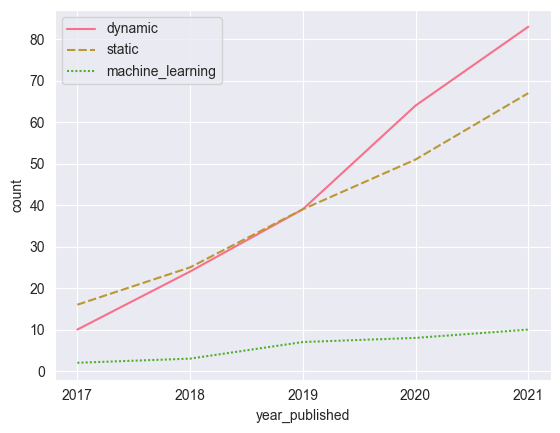

In [125]:
ax = sns.lineplot(cat_time_sum).set(ylabel='count')
plt.savefig('plots/category_time.pdf', bbox_inches='tight')

## Skills

In [126]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']
skills['proportion'] = (skills.number / skills.number.sum()) * 100
skills

,skills,number,proportion
0,['correctness'],74,60.655738
1,"['correctness', 'readability']",21,17.213115
2,"['correctness', 'maintainability']",8,6.557377
3,"['correctness', 'readability', 'maintainability']",7,5.737705
4,['readability'],6,4.918033
5,"['readability', 'maintainability']",4,3.278689
6,"['correctness', 'documentation']",1,0.819672
7,['maintainability'],1,0.819672


In [127]:
skills.number.sum()

122

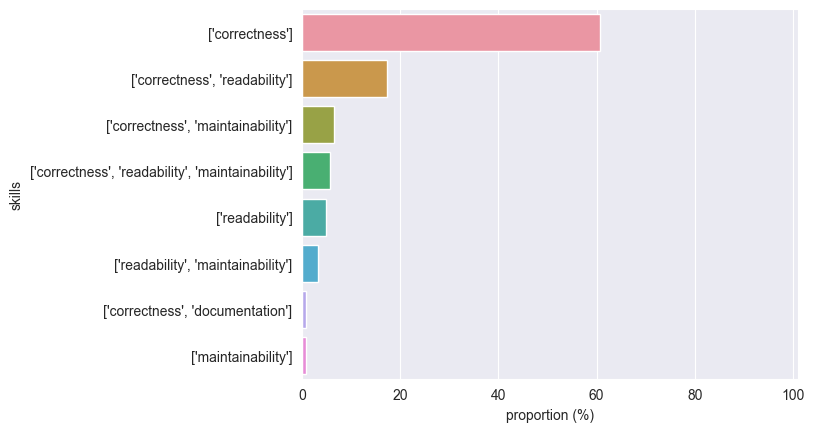

In [128]:
ax_skill = sns.barplot(skills, y='skills', x='proportion')
ax_skill.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skills.pdf', bbox_inches='tight')

# Skill-Category Complete Mapping
TODO: After mapping has been created
Plot horz bar chart and maybe a bipartie graph (Skill to category)

# Language

In [129]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_family", 'number']
families['proportion'] = (families.number / families.number.sum()) * 100
families

,language_family,number,proportion
0,['OOP'],84,68.852459
1,['Unknown'],9,7.377049
2,['Functional'],8,6.557377
3,['Agnostic'],5,4.098361
4,['Low-Level'],3,2.459016
5,['Graphics'],2,1.639344
6,"['OOP', 'Graphics']",2,1.639344
7,"['OOP', 'Functional']",2,1.639344
8,"['OOP', 'Agnostic']",2,1.639344
9,['Web'],2,1.639344


In [130]:
families.number.sum()

122

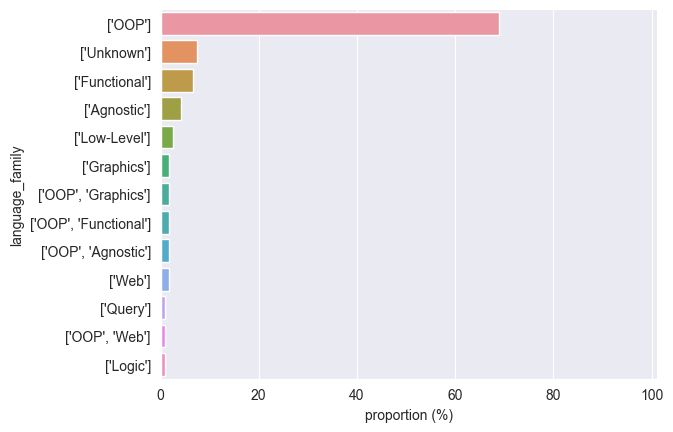

In [131]:
ax_lang = sns.barplot(families, y='language_family', x='proportion')
ax_lang.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

# Grading/Feedback Techniques

In [132]:
tech_df = pd.Series([tag.replace('technique:', '') for tags in df.tags for tag in tags if tag.startswith('technique')]).value_counts().reset_index()
tech_df.columns = ["technique", 'number']
tech_df['proportion'] = (tech_df.number / tech_df.number.sum()) * 100
tech_df

,technique,number,proportion
0,unit_testing,82,28.275862
1,pattern_matching,23,7.931034
2,model_solution_req,21,7.241379
3,static_analysis,21,7.241379
4,matching_rules,20,6.896552
5,program_repair,13,4.482759
6,model_solution_closeness,11,3.793103
7,machine_learning,10,3.448276
8,style_check,9,3.103448
9,code_repair_for_feedback,8,2.758621


In [133]:
def add_cats(tech):
    if tech in ['unit_testing', 'property_based_testing', 'ci', 'output_matching']:
        return 'dynamic'
    if tech in ['pattern_matching', 'static_analysis', 'code_metrics', 'cluster',
                'style_check', 'program_repair', 'rule_based', 'dsl_rules', 'model_solution_req',
                'model_solution_closeness', 'code_repair_for_feedback']:
        return 'static'
    if tech in ['machine_learning', 'misc']:
        return 'other'

In [134]:
tech_df['category'] = tech_df.technique.apply(lambda tech: add_cats(tech))
tech_df

,technique,number,proportion,category
0,unit_testing,82,28.275862,dynamic
1,pattern_matching,23,7.931034,static
2,model_solution_req,21,7.241379,static
3,static_analysis,21,7.241379,static
4,matching_rules,20,6.896552,None
5,program_repair,13,4.482759,static
6,model_solution_closeness,11,3.793103,static
7,machine_learning,10,3.448276,other
8,style_check,9,3.103448,static
9,code_repair_for_feedback,8,2.758621,static


In [135]:
tech_df.category.isna().sum()

30

In [136]:
tech_df[tech_df.category.isna()]

,technique,number,proportion,category
4,matching_rules,20,6.896552,None
10,ci_cd,7,2.413793,None
13,trace_examination,5,1.724138,None
14,pre_defined_questions,5,1.724138,None
15,dynamic_analysis,4,1.379310,None
16,clustering,3,1.034483,None
17,mutation_testing,3,1.034483,None
18,language_stuctures,3,1.034483,None
20,graph_analysis,2,0.689655,None
21,knowledge_base,2,0.689655,None


In [137]:
tech_df = tech_df.sort_values(by=['category', 'proportion'], ascending=[False, True])

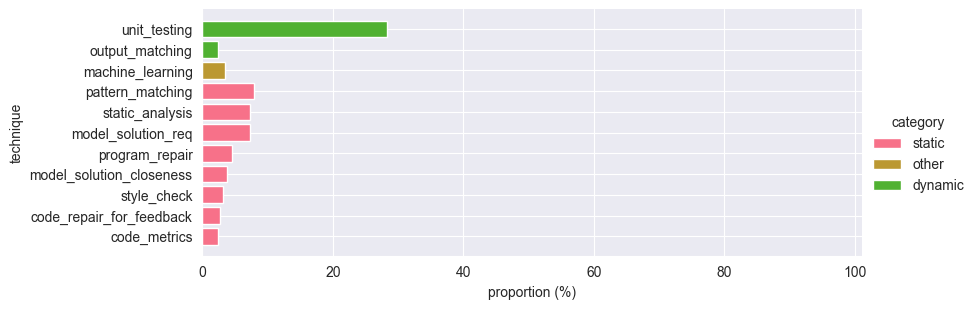

In [138]:
ax_tech_cat = sns.FacetGrid(tech_df[tech_df.number > 5], hue='category', aspect=3)
ax_tech_cat.map_dataframe(plt.barh, y='technique', width='proportion')

ax_tech_cat.set(xlim=[0, 101], xlabel='proportion (%)')
ax_tech_cat.add_legend()
plt.savefig('plots/technique_cat.pdf')

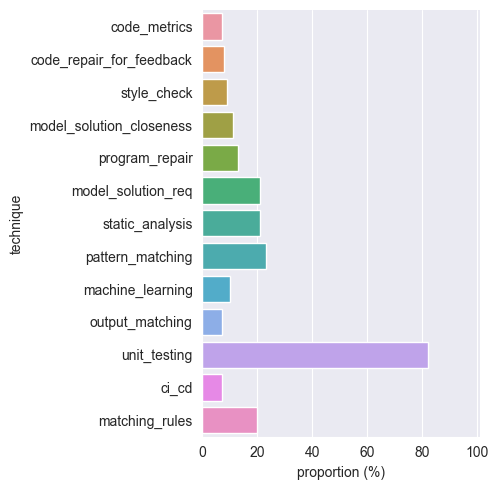

In [139]:
## TRUNCATED UNDER 6 RESULTS
ax_tech = sns.catplot(tech_df[tech_df['number'] > 5], y='technique', x='number', kind='bar')
ax_tech.set(xlabel = 'proportion (%)')

plt.xlim([0, 101])
plt.savefig('plots/technique_not_cat.pdf', bbox_inches='tight')

# Evaluation

In [140]:
# NEEDS DEDUPLICATION

evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation

,evaluation,number,proportion
0,student_survey,38,23.312883
1,manual_grading,36,22.085890
2,analytics,20,12.269939
3,auto_grading,15,9.202454
4,none,12,7.361963
5,user_study,6,3.680982
6,grading_accuracy,6,3.680982
7,teacher_survey,6,3.680982
8,compared_to_other_tools,5,3.067485
9,anecdotal,5,3.067485


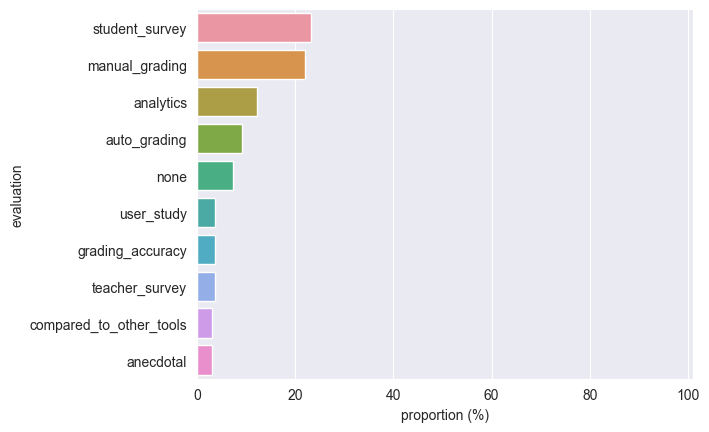

In [141]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

# Data
## Data Types

In [142]:
data_types = pd.Series([tag.replace('data:', '') for tags in df.tags for tag in tags if tag.startswith('data:')]).value_counts().reset_index()
data_types.columns = ["data_types", 'number']
data_types['proportion'] = (data_types.number / data_types.number.sum()) * 100
data_types

,data_types,number,proportion
0,internal_assignments,85,65.891473
1,none,13,10.077519
2,internal_exams,13,10.077519
3,bespoke_assignment,6,4.651163
4,hackerrank,2,1.550388
5,leetcode,1,0.775194
6,microsoft_dev204_1x,1,0.775194
7,internal_tutorial,1,0.775194
8,code_defenders_dataset,1,0.775194
9,text_book_exercises,1,0.775194


## Data Availiablity

In [143]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

,data_available,number,proportion
0,False,104,85.245902
1,on_request,9,7.377049
2,True,9,7.377049


In [144]:
data_availability.number.sum()

122

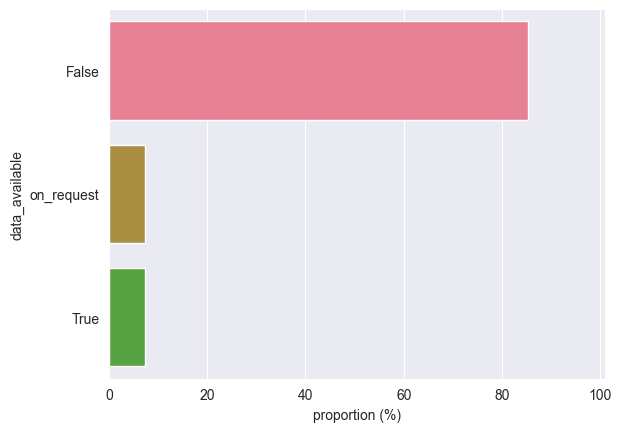

In [145]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'proportion (%)')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')

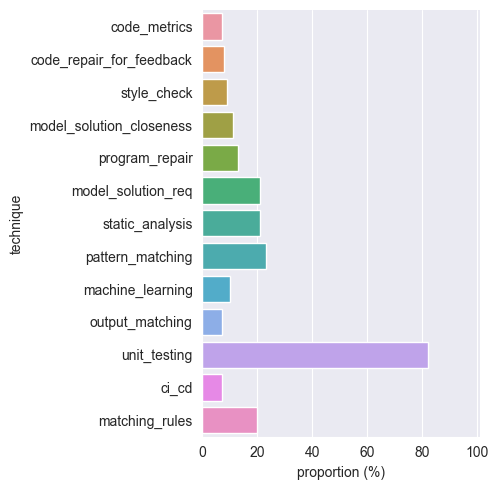

In [146]:
## TRUNCATED UNDER 6 RESULTS
ax_tech = sns.catplot(tech_df[tech_df['number'] > 5], y='technique', x='number', kind='bar')
ax_tech.set(xlabel = 'proportion (%)')

plt.xlim([0, 101])
plt.savefig('plots/technique_not_cat.pdf', bbox_inches='tight')

# Evaluation

In [147]:
# NEEDS DEDUPLICATION

evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation

,evaluation,number,proportion
0,student_survey,38,23.312883
1,manual_grading,36,22.085890
2,analytics,20,12.269939
3,auto_grading,15,9.202454
4,none,12,7.361963
5,user_study,6,3.680982
6,grading_accuracy,6,3.680982
7,teacher_survey,6,3.680982
8,compared_to_other_tools,5,3.067485
9,anecdotal,5,3.067485


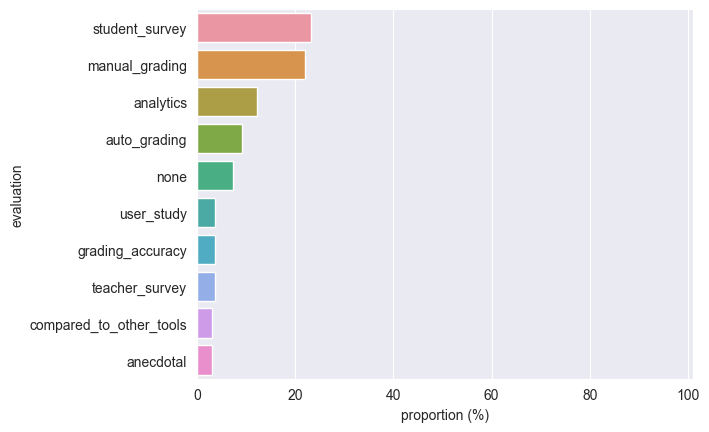

In [148]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

## Data Availiablity

In [149]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

,data_available,number,proportion
0,False,104,85.245902
1,on_request,9,7.377049
2,True,9,7.377049


In [150]:
data_availability.number.sum()

122

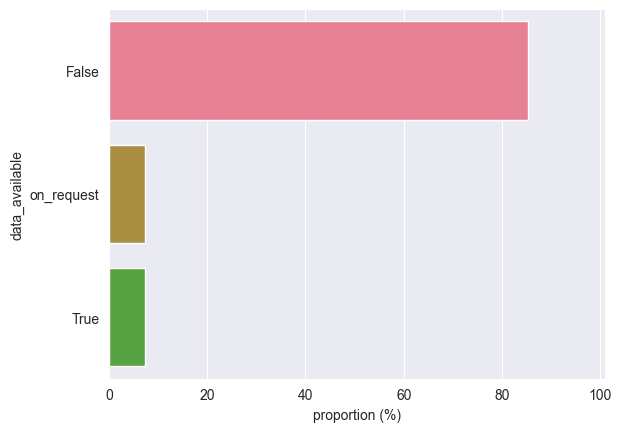

In [151]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'proportion (%)')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')